In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True

sb.set()

In [2]:
records = pd.read_csv('records.csv')

In [3]:
records[['Timestamp', 'Nodes', 'Iterant', 'Relative error']]

,Timestamp,Nodes,Iterant,Relative error
0,2018-04-26 11:34:42,1.0,ajacobi,0.000100
1,2018-04-26 11:34:54,16.0,ajacobi,0.000236
2,2018-04-26 11:33:29,1.0,jacobi,0.000100
3,2018-04-26 11:34:12,16.0,jacobi,0.000414


In [4]:
df1_a = pd.read_csv('example.laplace3d_ajacobi_2018-04-26_11-34-42.csv', index_col=0)
df16_a = pd.read_csv('example.laplace3d_ajacobi_2018-04-26_11-34-54.csv', index_col=0)

df1_s = pd.read_csv('example.laplace3d_jacobi_2018-04-26_11-33-29.csv', index_col=0)
df16_s = pd.read_csv('example.laplace3d_jacobi_2018-04-26_11-34-12.csv', index_col=0)

In [5]:
toma = pd.concat([df1_a.iloc[:,0],
                  df16_a.iloc[:,0],
                  df1_s.iloc[:,0],
                  df16_s.iloc[:,0]], axis=1)
toma.columns = ['AJacobi 1', 'AJacobi 16', 'Jacobi 1', 'Jacobi 16']
toma.head()

,AJacobi 1,AJacobi 16,Jacobi 1,Jacobi 16
Time [s],,,,
0.000000,1.0,1.0,1.0,1.0
0.000003,NaN,NaN,NaN,NaN
0.000003,NaN,NaN,NaN,NaN
0.000003,NaN,NaN,NaN,NaN
0.000004,NaN,NaN,NaN,NaN


# Convergence

Text(0,0.5,'Relative error')

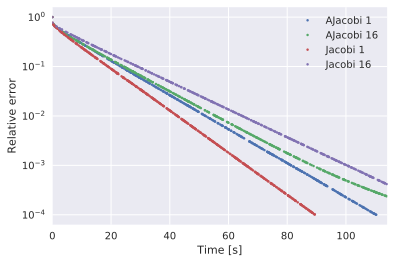

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
toma.iloc[::20].plot(ax=ax, logy=True, ms=5, style=['.', '.', '.', '.'])
ax.set_ylabel('Relative error')

# fig.savefig('toma.png', dpi=300)

# Observations

Jacobi is faster than AJacobi on 1 node.

Jacobi is slower than AJacobi on 16 nodes.

The convergence of AJacobi seems to slow down with time?

It seems the difference is related to cache effects